In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [18]:
raw_data_path = '/home/alisher/news_ner/data/tengri_news.csv'
df = pd.read_csv(raw_data_path)
print(f"Dataset shape: {df.shape}")
print(f"Column names: {df.columns.tolist()}")
df.head()

Dataset shape: (27588, 4)
Column names: ['title', 'url', 'tags', 'text']


,title,url,tags,text
0,Әлемдегі ең танымал туристік бағыттар аталды,https://kaz.tengritravel.kz/around-the-world/alemdeg-en-tanyimal-turistk-bagyittar-ataldyi-324694/,"['туризм', 'рейтинг', 'саяхат']","Tripadvisor нұсқасы бойынша Индонезияның Бали аралы ең танымал туристік бағыт болып танылды, - д..."
1,2020 жылдың қорытындысы бойынша Қазақстан халқының саны белгілі болды,https://kaz.tengrinews.kz/kazakhstan_news/2020-jyildyin-koryityindyisyi-boyyinsha-kazakstan-halk...,"['қазақстан', 'халық саны']",2021 жылы елдегі халық саны 18 миллион 877 мың адам болды. Бұл өткен жылмен салыстырғанда 245 мы...
2,Қазақстандықтар 2021 жылды қарсы алып жатыр,https://kaz.tengrinews.kz/kazakhstan_news/kazakstandyiktar-2021-jyildyi-karsyi-alyip-jatyir-317192/,"['мереке', 'жаңа жыл']",Қазақстандықтар 2021 жылды қарсы алып жатыр. 2020 жыл коронавирус және пандемиямен есте қалмақ. ...
3,2022 жылы Балқаш көлінде демалу қанша тұрады,https://kaz.tengritravel.kz/my-country/2022-jyilyi-balkash-kolnde-demalu-kansha-turadyi-338748/,"['туризм', 'балқаш', 'турист', 'саяхат']",2022 жылдың жазғы маусымында Балқаш көлінде демалу да жақындап қалды. Демалыс орындарының иелері...
4,Тоқаев қазақстандықтарды 2022 жылы не күтіп тұрғанын айтты,https://kaz.tengrinews.kz/kazakhstan_news/tokaev-kazakstandyiktardyi-2022-jyilyi-ne-kutp-turgany...,"['тоқаев қасым-жомарт', 'жаңа жыл']","Президент Қасым-Жомарт Тоқаев қазақстандықтарды 2022 жылы не күтіп тұрғанын айтты, - деп хабарла..."


In [19]:
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Duplicate titles: {df['title'].duplicated().sum()}")
print(f"Duplicate URLs: {df['url'].duplicated().sum()}")

Duplicate rows: 0
Duplicate titles: 0
Duplicate URLs: 0


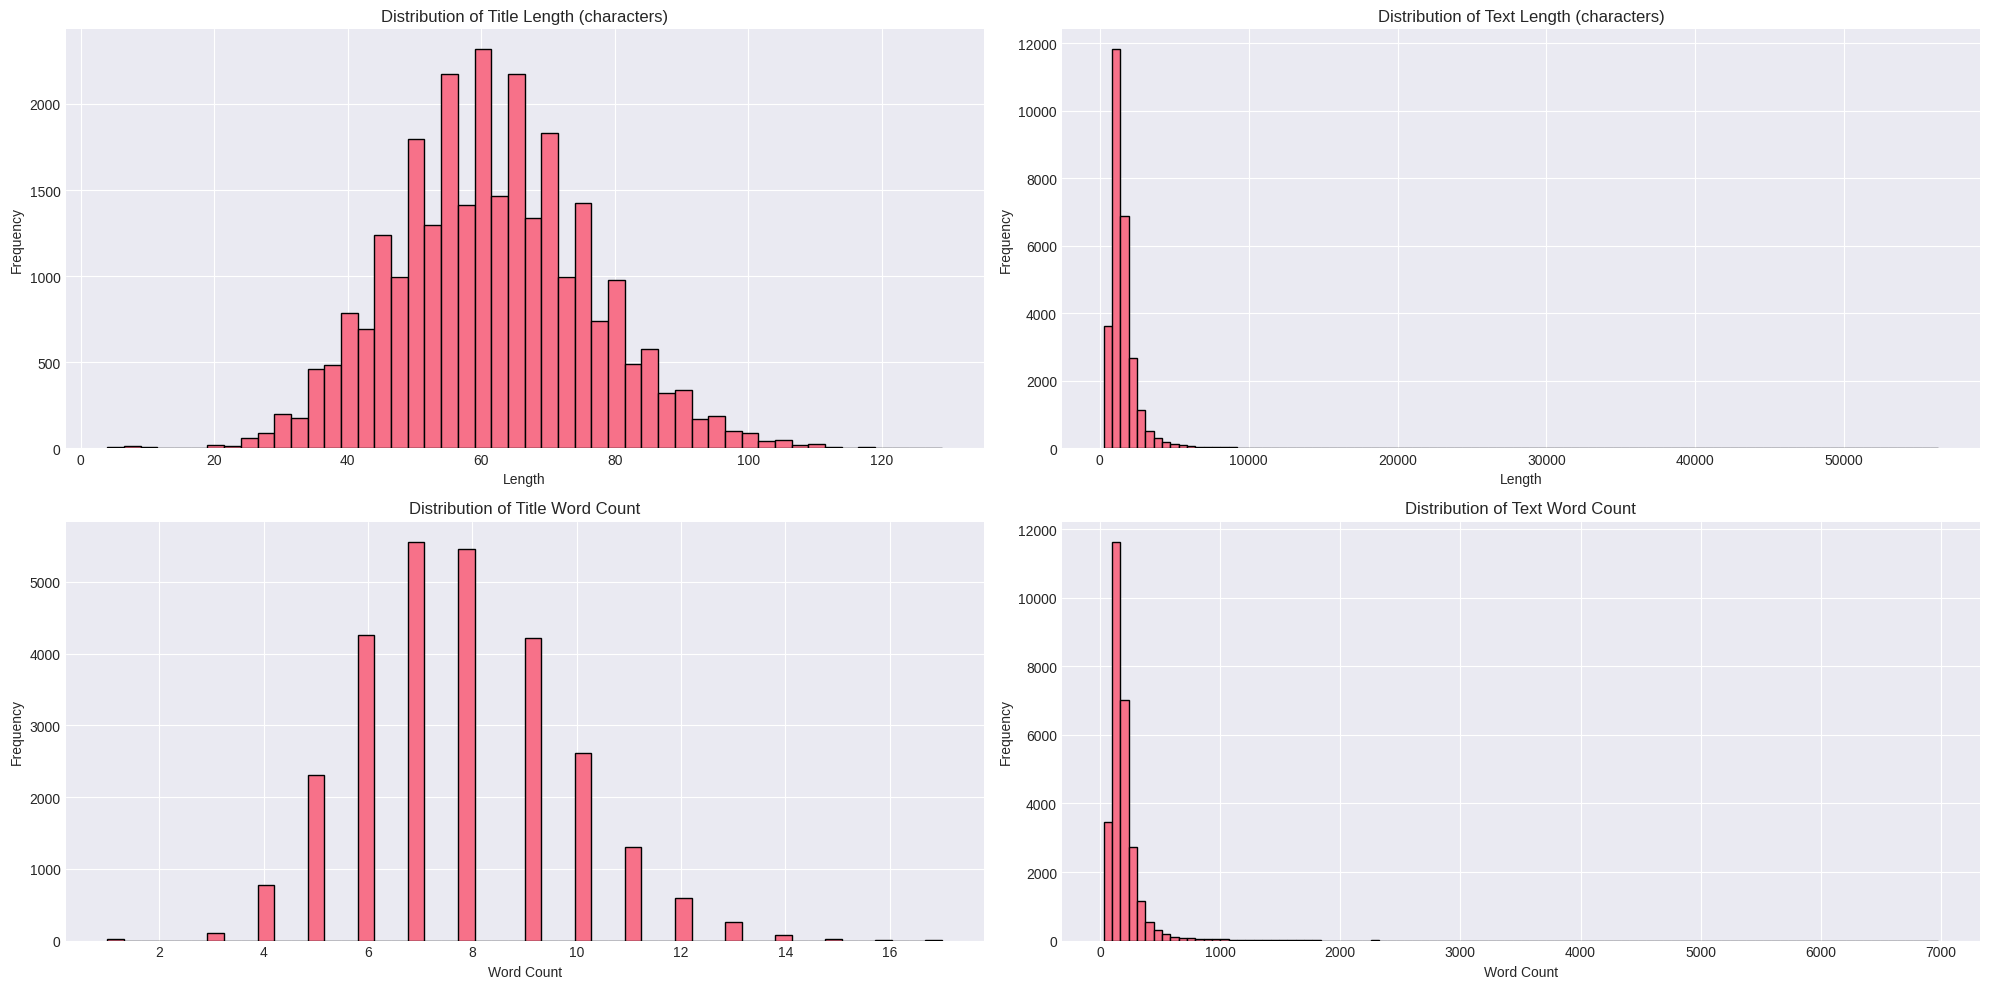

In [26]:
df['title_length'] = df['title'].str.len()
df['text_length'] = df['text'].str.len()
df['word_count_title'] = df['title'].str.split().str.len()
df['word_count_text'] = df['text'].str.split().str.len()

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0, 0].hist(df['title_length'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of Title Length (characters)')
axes[0, 0].set_xlabel('Length')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['text_length'], bins=100, edgecolor='black')
axes[0, 1].set_title('Distribution of Text Length (characters)')
axes[0, 1].set_xlabel('Length')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['word_count_title'], bins=50, edgecolor='black')
axes[1, 0].set_title('Distribution of Title Word Count')
axes[1, 0].set_xlabel('Word Count')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['word_count_text'], bins=100, edgecolor='black')
axes[1, 1].set_title('Distribution of Text Word Count')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
print("Text Length Statistics:")
print(df[['title_length', 'text_length', 'word_count_title', 'word_count_text']].describe())

Text Length Statistics:
       title_length   text_length  word_count_title  word_count_text
count  27588.000000  27588.000000      27588.000000     27588.000000
mean      61.379622   1556.660323          7.742859       194.233254
std       14.652806   1262.967651          1.948719       160.230368
min        4.000000    253.000000          1.000000        30.000000
25%       51.000000    972.000000          6.000000       121.000000
50%       61.000000   1292.000000          8.000000       160.000000
75%       71.000000   1751.000000          9.000000       218.000000
max      129.000000  56331.000000         17.000000      6978.000000


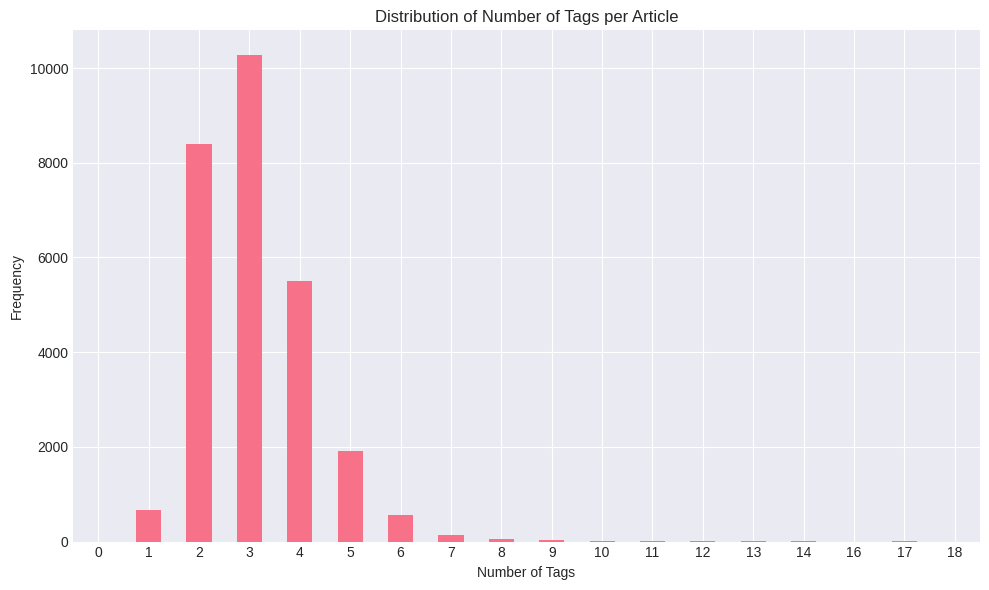


Average tags per article: 3.09
Max tags in an article: 18
Min tags in an article: 0


In [29]:
df['tags_list'] = df['tags'].apply(eval)
df['num_tags'] = df['tags_list'].str.len()

plt.figure(figsize=(10, 6))
df['num_tags'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Tags per Article')
plt.xlabel('Number of Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\nAverage tags per article: {df['num_tags'].mean():.2f}")
print(f"Max tags in an article: {df['num_tags'].max()}")
print(f"Min tags in an article: {df['num_tags'].min()}")

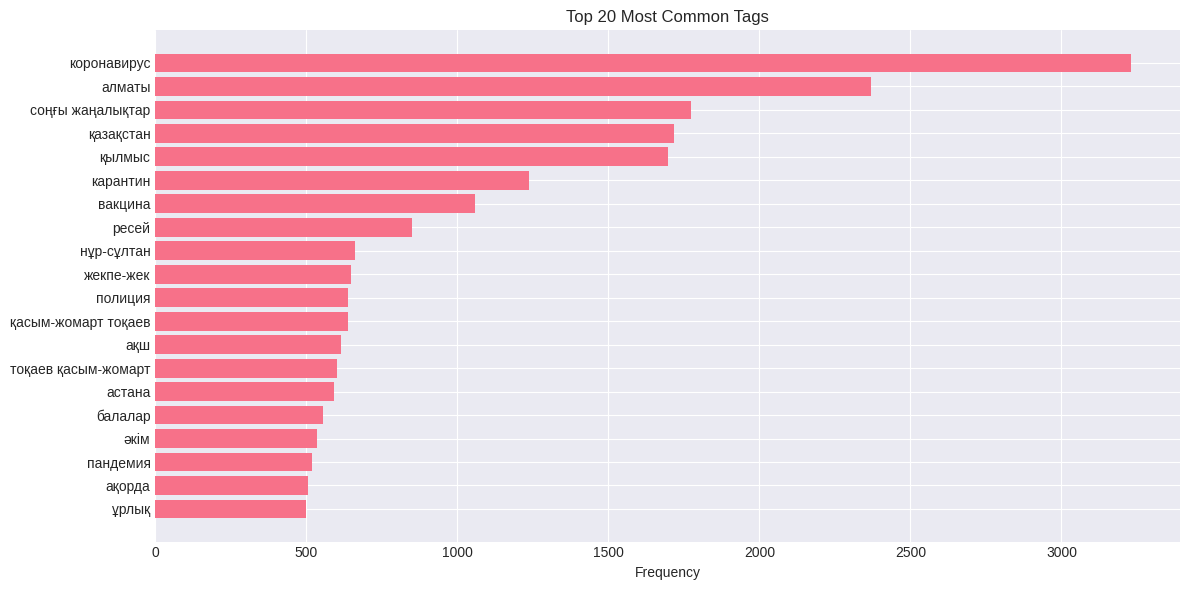

Total unique tags: 2460
Top 20 Tags:
                    Tag  Count
0           коронавирус   3231
1                алматы   2369
2      соңғы жаңалықтар   1774
3             қазақстан   1717
4                қылмыс   1697
5              карантин   1238
6               вакцина   1059
7                 ресей    849
8            нұр-сұлтан    660
9             жекпе-жек    648
10              полиция    639
11  қасым-жомарт тоқаев    639
12                  ақш    615
13  тоқаев қасым-жомарт    602
14               астана    593
15              балалар    556
16                 әкім    535
17             пандемия    520
18               ақорда    504
19                ұрлық    500


In [31]:
all_tags = []
for tags in df['tags_list']:
    all_tags.extend(tags)

tag_counts = Counter(all_tags)
top_20_tags = tag_counts.most_common(20)

tags_df = pd.DataFrame(top_20_tags, columns=['Tag', 'Count'])

plt.figure(figsize=(12, 6))
plt.barh(tags_df['Tag'], tags_df['Count'])
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Tags')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Total unique tags: {len(tag_counts)}")
print("Top 20 Tags:")
print(tags_df)

Top 15 Tag Co-occurrences:
вакцина + коронавирус: 675
карантин + коронавирус: 647
коронавирус + пневмония: 448
коронавирус + пандемия: 404
коронавирус + қазақстан: 395
бокс + жекпе-жек: 308
коронавирус + статистика: 235
алматы + қылмыс: 227
алматы + коронавирус: 211
алматы + карантин: 199
мектеп + оқушы: 183
жекпе-жек + соңғы жаңалықтар: 160
туризм + турист: 155
полиция + қылмыс: 149
денсаулық + коронавирус: 147


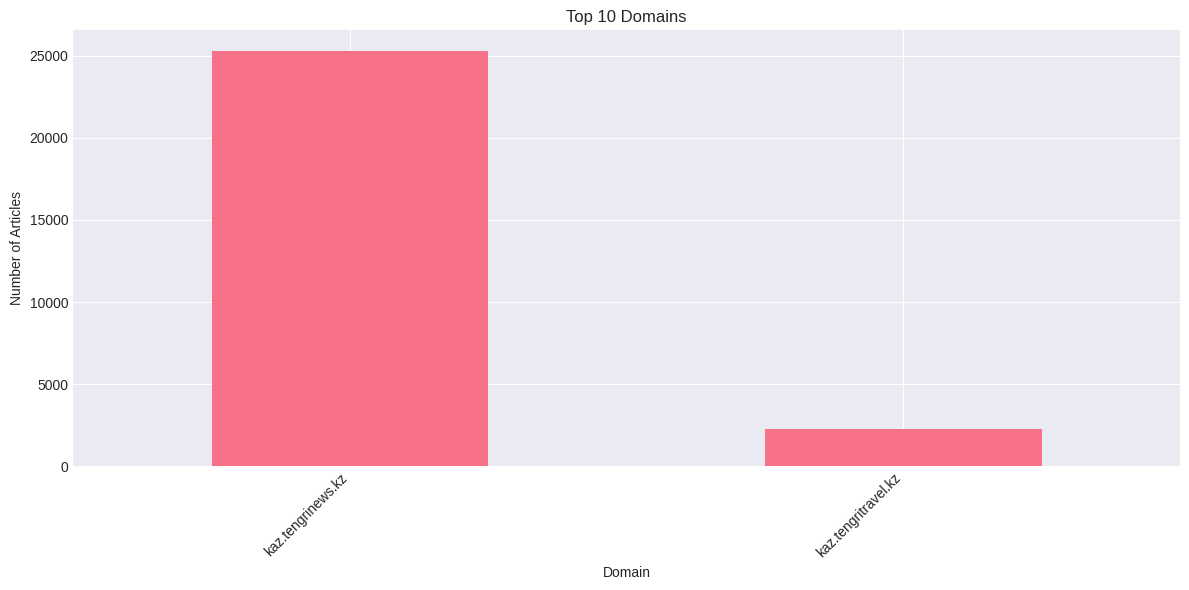

Domain Distribution:
domain
kaz.tengrinews.kz      25286
kaz.tengritravel.kz     2302
Name: count, dtype: int64


In [33]:
from itertools import combinations

tag_pairs = []
for tags in df['tags_list']:
    if len(tags) > 1:
        pairs = list(combinations(sorted(tags), 2))
        tag_pairs.extend(pairs)

pair_counts = Counter(tag_pairs)
top_pairs = pair_counts.most_common(15)

print("Top 15 Tag Co-occurrences:")
for pair, count in top_pairs:
    print(f"{pair[0]} + {pair[1]}: {count}")

df['domain'] = df['url'].str.extract(r'https?://([^/]+)')

domain_counts = df['domain'].value_counts().head(10)

plt.figure(figsize=(12, 6))
domain_counts.plot(kind='bar')
plt.title('Top 10 Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Domain Distribution:")
print(domain_counts)

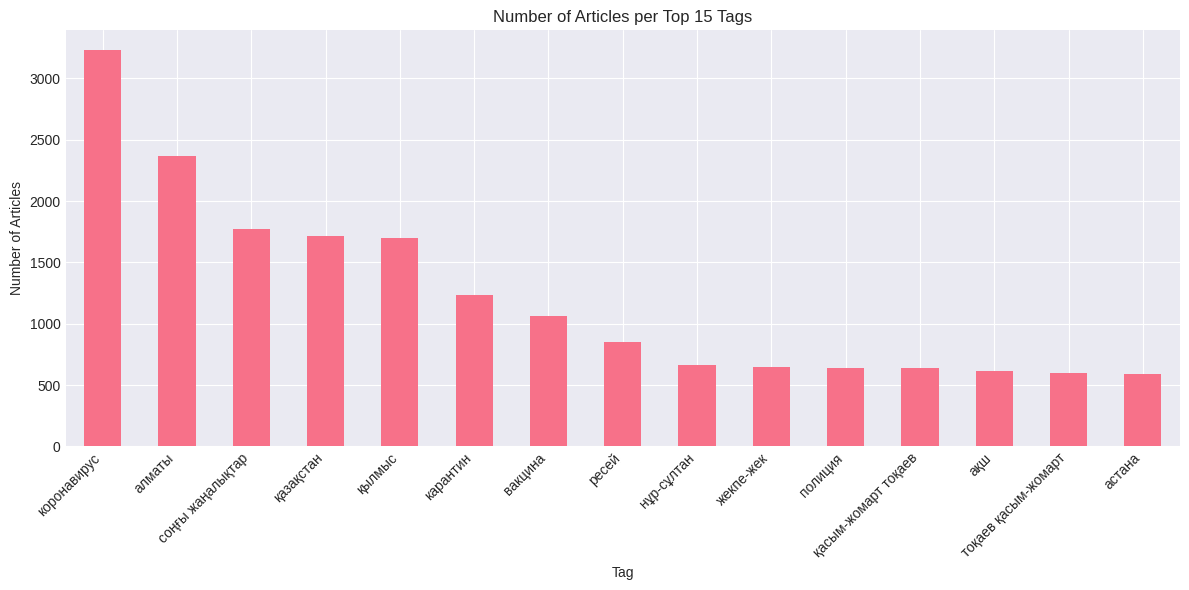

In [34]:
tag_article_counts = pd.Series(all_tags).value_counts()

plt.figure(figsize=(12, 6))
tag_article_counts.head(15).plot(kind='bar')
plt.title('Number of Articles per Top 15 Tags')
plt.xlabel('Tag')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
print("=" * 60)
print("DATASET SUMMARY REPORT")
print("=" * 60)
print(f"\nTotal Articles: {len(df)}")
print(f"Unique Titles: {df['title'].nunique()}")
print(f"Unique URLs: {df['url'].nunique()}")
print(f"\nTotal Unique Tags: {len(tag_counts)}")
print(f"Average Tags per Article: {df['num_tags'].mean():.2f}")
print(f"\nAverage Title Length: {df['title_length'].mean():.1f} characters")
print(f"Average Text Length: {df['text_length'].mean():.1f} characters")
print(f"Average Words in Title: {df['word_count_title'].mean():.1f}")
print(f"Average Words in Text: {df['word_count_text'].mean():.1f}")
print(f"\nDomains Covered: {df['domain'].nunique()}")
print("=" * 60)

DATASET SUMMARY REPORT

Total Articles: 27588
Unique Titles: 27588
Unique URLs: 27588

Total Unique Tags: 2460
Average Tags per Article: 3.09

Average Title Length: 61.4 characters
Average Text Length: 1556.7 characters
Average Words in Title: 7.7
Average Words in Text: 194.2

Domains Covered: 2


In [55]:
# Filter records where tag is 'something'
filtered_df = df[df['tags_list'].apply(lambda x: 'қылмыс' in x)]

filtered_df[['title', 'text', 'url']].to_csv('../data/filtered_articles_crime.csv', index=False)